In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import activations

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
# for 2nd attempt
from keras.callbacks import EarlyStopping

import keras.backend as K

2024-11-04 09:22:08.046635: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Fitting a 1d function with a deep neural network

## Aim

To find the the best architecture and training setup to fit a pre-defined function

$f(x) = 10\sin(10 x) + (x-1)(x+2)(x-1/2)+80 e^{-10*(x-2)^2} $

In [2]:
# let's choose a simple 1->1 function to train
def f(x):
    return 10*np.sin(10*x)+(x-3)*(x+2)*(x-1/2)+80*np.exp(-(x-2)**2/0.1)

In [3]:
# evaluate some data points
datasize = 10000
datapoints = np.linspace(-5,5,datasize)
datavalues = f(datapoints)
data = np.transpose([datapoints,datavalues])

In [4]:
# shuffle data - important for splitting into testing and training
np.random.shuffle(data)

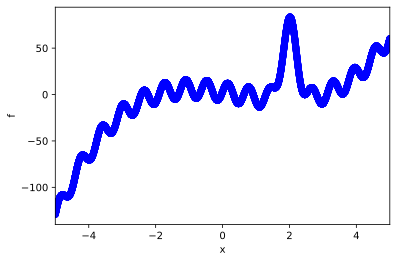

In [5]:
# plot the data points to see how they are distributed
plt.plot(datapoints, datavalues, 'bo')
plt.xlim([-5,5])
plt.ylabel('f')
plt.xlabel('x');

In [6]:
## split into testing and training sets
split = int(len(data)*60/100)

The output range is not between 0 and 1 so if we were to use a tanh/sigmoid activation function it would fail. We can process the output data using

$\hat{f}_i = \frac{f_i-f_{\rm min}}{f_{\rm max}-f_{min}}$

which lies between 0 and 1

In [7]:
# make sure all data is positive
def process_data(data):
    data_in_array = data[:,0]
    #data_in_ave = np.ave(data_in_array)
    #data_in_max = np.max(data_in_array)
    #data_in_min = np.min(data_in_array)
    #data_in_std = np.std(data_in_array)
    
    data_out_array = data[:,1]
    #data_out_ave = np.ave(data_out_array)
    data_out_max = np.max(data_out_array)
    data_out_min = np.min(data_out_array)
    #data_out_std = np.std(data_out_array)
    
    data_out_array = (data_out_array-data_out_min)/(data_out_max-data_out_min)
    
    data_processed = np.transpose([data_in_array,data_out_array])
    return data_processed, data_out_min, data_out_max

def unprocess_prediction(values, ymin, ymax):
    return values*(ymax-ymin) + ymin

In [8]:
tf.keras.backend.clear_session()

In [9]:
# Initialise model: 1-16-32-16-1
model = Sequential([
    Dense(30, activation='sigmoid', input_shape=(1,)),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    optimizer = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False),
    loss = 'mean_squared_error')

2024-11-04 09:22:15.665718: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
data_processed, ymin, ymax = process_data(data)
print(ymin, ymax)

-129.3762514629607 83.46758313267206


[3.59785979 0.47958424]
[3.59785979 0.61009912]


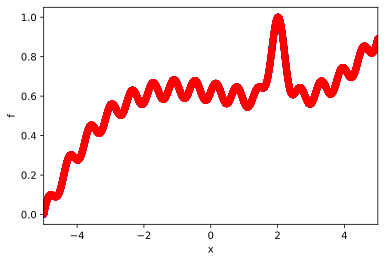

In [11]:
print(data[0])
print(data_processed[0])

plt.plot(data_processed[:split,0], data_processed[:split,1], 'bo')
plt.plot(data_processed[split:,0], data_processed[split:,1], 'ro')
plt.xlim([-5,5])
plt.ylabel('f')
plt.xlabel('x');

In [12]:
ES = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=1000,
    verbose=1,
    restore_best_weights=True)

history = model.fit(
    data_processed[0:split,0],
    data_processed[0:split,1],
    epochs=500,
    validation_data=(data_processed[split:,0], data_processed[split:,1]),
    #callbacks=[ES],
    #batch_size=1028,
    verbose=1
)

Epoch 1/500
188/188 [==============================] - 1s 3ms/step - loss: 0.0122 - val_loss: 0.0086
Epoch 2/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.0071
Epoch 3/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0065
Epoch 4/500
188/188 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0061
Epoch 5/500
188/188 [==============================] - 1s 3ms/step - loss: 0.0071 - val_loss: 0.0059
Epoch 6/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0058
Epoch 7/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0060
Epoch 8/500
188/188 [==============================] - 1s 3ms/step - loss: 0.0065 - val_loss: 0.0061
Epoch 9/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0054
Epoch 10/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0064 - val_lo

Epoch 161/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 162/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 163/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 164/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 165/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 166/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 167/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 168/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 169/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 170/500
188/188 [==============================] - 0s 2ms/step - lo

188/188 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 320/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 321/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 322/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 323/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 324/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 325/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 326/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 327/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 328/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0011 - v

188/188 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 478/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 479/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 480/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 481/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 482/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 483/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 484/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 485/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 486/500
188/188 [==============================] - 0s 2ms/step - loss: 0.0010 - v

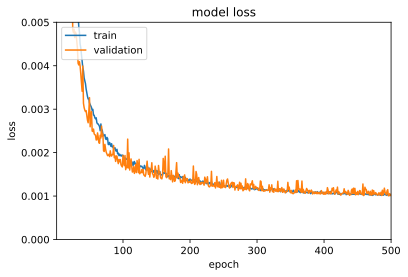

In [13]:
# now we can plot the history to see how the loss function for the
# training and validation set changed with epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.xlim([1,500])
plt.ylim([0,0.005])
plt.show()

In [14]:
datapoints2 = np.random.uniform(low=-5, high=5, size=(1000,))
datavalues2 = np.array(list(map(f, datapoints2)))
valuespred = model.predict(datapoints2)

32/32 [==============================] - 0s 2ms/step


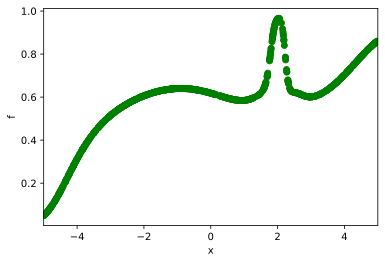

In [20]:
plt.plot(datapoints2, valuespred, 'go')
plt.xlim([-5,5])
plt.ylabel('f')
plt.xlabel('x');

In [21]:
valuespred_un = unprocess_prediction(valuespred, ymin, ymax)

In [30]:
datavalues2[0]-valuespred_un[0]

array([6.054607], dtype=float32)

In [24]:
plt.plot(datapoints2, datavalues2-valuespred_un, 'go')
plt.xlim([-5,5])
plt.ylabel('delta-f')
plt.xlabel('x');

Error in callback <function flush_figures at 0x7f7a6ac185e0> (for post_execute):


KeyboardInterrupt: 

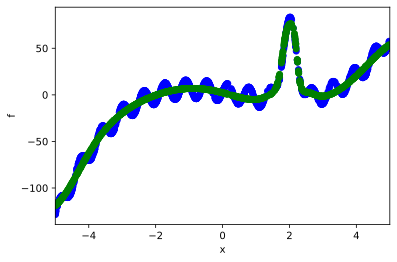

In [23]:
plt.plot(datapoints2, datavalues2, 'bo')
plt.plot(datapoints2, valuespred_un, 'go')
plt.xlim([-5,5])
plt.ylabel('f')
plt.xlabel('x');

## Exercises ##

1) Edit the code to create an arbitrary archictecture from a list of layer depths. How does the fit depend on the architecture?

2) Change the activation function used in the nodes to tanh, what changes in the output? Do you need to change the normalisation?

3) Vary the number of input data points. Is there an optimal number?

4) Using the template for early stopping try to optimise the number of epochs needed by the network

https://keras.io/api/callbacks/early_stopping/

5) How does batch size affect the training time and fit?

6) Split the input and output data set according to random shuffle rather than a slice, do you see any affect? (see sklearn.model_selection.train_test_split).

7) Can we change the loss function to prefer certain regions or features? (Only think about this - no need to implement it)